<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP2/ML_TP2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

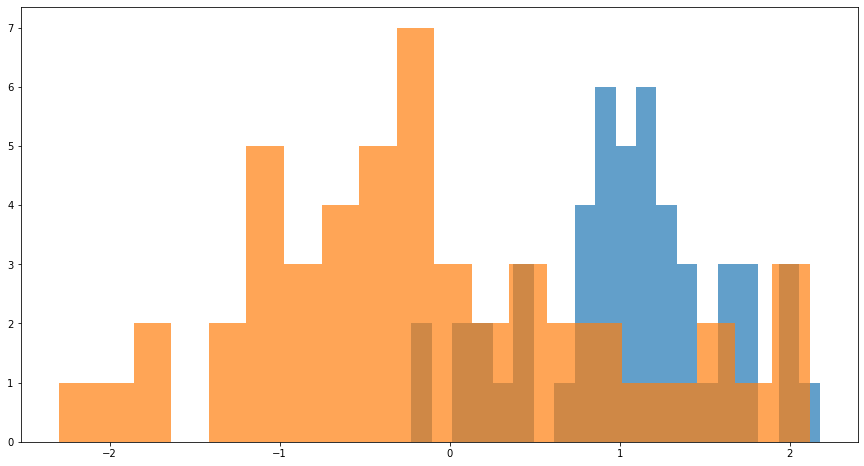

,valor,etiqueta
0,1.338580,a
1,0.752597,a
2,1.283987,a
3,0.330891,a
4,1.066692,a


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 50 #cantidad de datos
valores_a = np.random.normal(1, 0.5, N) #Vector de datos random-normales
valores_b = np.random.normal(-0.25, 1, N)

letras_a = np.full((N,1), 'a') #Vector con letras para las etiq
letras_b = np.full((N,1), 'b')

df = pd.DataFrame(np.concatenate([valores_a, valores_b]), columns=['valor'])
df['etiqueta'] = np.concatenate([letras_a,letras_b])

plt.figure(figsize=(15,8))
plt.hist(valores_a, alpha=0.7, bins=20)
plt.hist(valores_b, alpha=0.7, bins=20)
plt.show()

df.head()

In [201]:
dfc = df.copy() #Hago una copia para que no me rompa el original

dfc['clasificacion'] = (np.concatenate( [ letras_a , letras_b ] ) == 'b') #Me fijo cuales son b
#Entonces verdadero = 'es b', y falso = 'es a'
dfc = dfc.sort_values('valor') #ordeno usando la columna valor
dfc = dfc.set_index(pd.Series(range(dfc.shape[0]))) #reconstruyo el indice para que no quede desordenado

cantidad_de_b = dfc.clasificacion.sum() #Como True=1 y False=0, esta suma es igual a la cantidad de b
cantidad_de_a = dfc.shape[0] - cantidad_de_b

dfc['b_cumsum'] = dfc.clasificacion.cumsum() #Acumulo hacia abajo cuantas filas son de b 
dfc['TPR'] = dfc.clasificacion.cumsum()/cantidad_de_b #Divido los acumulados de b por la totalidad de b
dfc['a_cumsum']  = range(1,1+dfc.shape[0]) - dfc['b_cumsum'] #El primer termino siempre suma 1, 
                                            #               y el segundo es 1 si esa fila era b.
dfc['FPR'] = dfc['a_cumsum']/cantidad_de_a #Divido los acumulados de a por la totalidad de a
dfc.tail()

,valor,etiqueta,clasificacion,b_cumsum,TPR,a_cumsum,FPR
95,2.013497,a,False,48,0.96,48,0.96
96,2.026526,a,False,48,0.96,49,0.98
97,2.035420,b,True,49,0.98,49,0.98
98,2.119015,b,True,50,1.00,49,0.98
99,2.174677,a,False,50,1.00,50,1.00


<Figure size 1080x576 with 0 Axes>

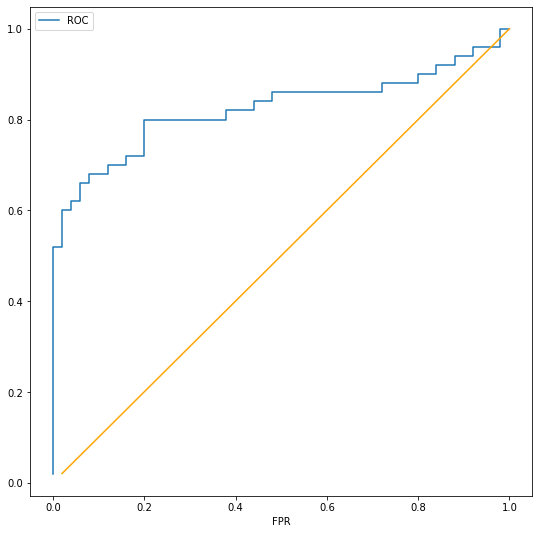

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
dfc.plot(x='FPR', y='TPR', figsize=(9,9), label='ROC') #Curva ROC
plt.plot(dfc['TPR'],dfc['TPR'], c='orange') #Identidad
plt.legend()
plt.show()

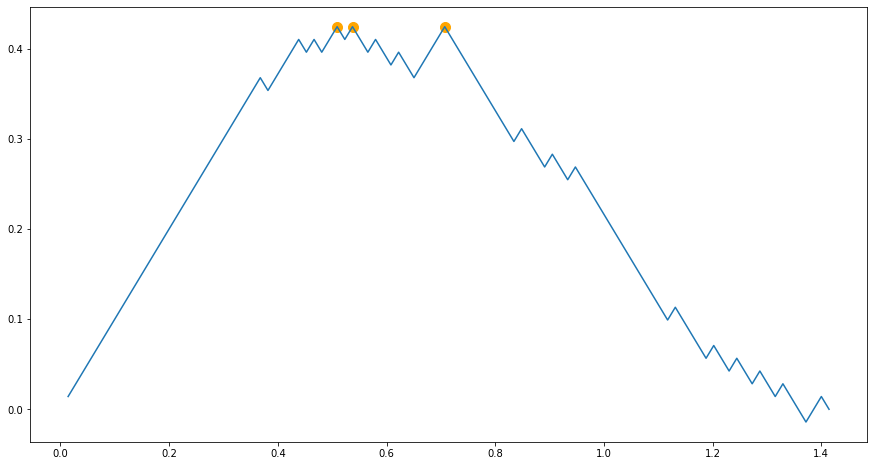

In [212]:
#Uso como paráámetro la mááxima distancia perpendicular a la recta identidad.
#Para encontrar ese punto, roto la curva 45 grados a la derecha, 
# entonces esa distancia se convierte en la altura

theta = np.pi/4
R = np.array([[np.cos(theta),-np.sin(theta)], 
              [np.sin(theta),np.cos(theta)]])
A = dfb[['FPR', 'TPR']].to_numpy()
A_rotado = A.dot(R)

indice_max = np.where(A_rotado[:,1] == A_rotado[:,1].max()) 
#Con el ííndice del valor mááximo puedo encontrar  el punto original.

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(A_rotado[:,0],A_rotado[:,1])
plt.scatter(A_rotado[indice_max,0],A_rotado[indice_max,1], c='orange',s=100)
plt.show()

<Figure size 1080x576 with 0 Axes>

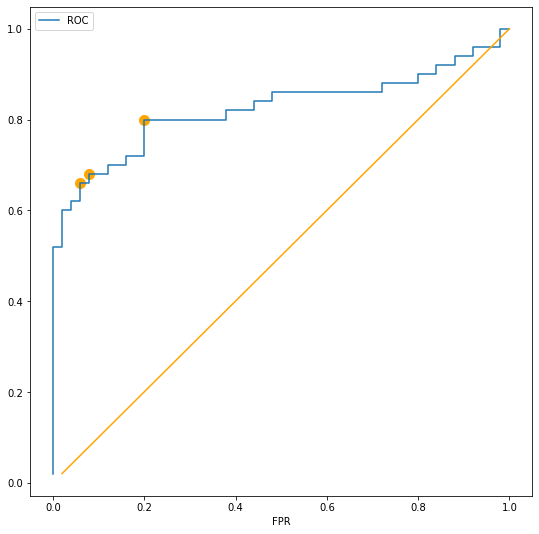

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
dfc.plot(x='FPR', y='TPR', figsize=(9,9), label='ROC') #Curva ROC
plt.plot(dfc['TPR'],dfc['TPR'], c='orange') #Identidad
plt.scatter(A[indice_max,0],A[indice_max,1], c='orange', s=100)
plt.legend()
plt.show()

In [214]:
#El punto indicado es:
dfb.iloc[indice_max[0]]

,valor,etiqueta,clasificacion,b_cumsum,TPR,a_cumsum,FPR,TP,FP,TN,FN,precision,f_measure,jaccard,exactitud
35,0.113503,b,True,33,0.66,3,0.06,33,3,47,17,0.916667,0.767442,0.622642,0.808081
37,0.167448,b,True,34,0.68,4,0.08,34,4,46,16,0.894737,0.772727,0.629630,0.808081
49,0.660495,b,True,40,0.80,10,0.20,40,10,40,10,0.800000,0.800000,0.666667,0.808081


In [215]:
dfb = dfc.copy() #Hago una copia para que no me rompa el original

dfb['TP'] = dfb['b_cumsum'] #Encuentro los TP en funcióón de si el umbral estáá puesto en tal fila
dfb['FP'] = dfb['a_cumsum'] #Lo mismo para el resto
dfb['TN'] = cantidad_de_a - dfb['FP']
dfb['FN'] = cantidad_de_b - dfb['TP']
dfb.head()

,valor,etiqueta,clasificacion,b_cumsum,TPR,a_cumsum,FPR,TP,FP,TN,FN
0,-2.300428,b,True,1,0.02,0,0.0,1,0,50,49
1,-2.021797,b,True,2,0.04,0,0.0,2,0,50,48
2,-1.702472,b,True,3,0.06,0,0.0,3,0,50,47
3,-1.641753,b,True,4,0.08,0,0.0,4,0,50,46
4,-1.403919,b,True,5,0.10,0,0.0,5,0,50,45


<Figure size 1080x576 with 0 Axes>

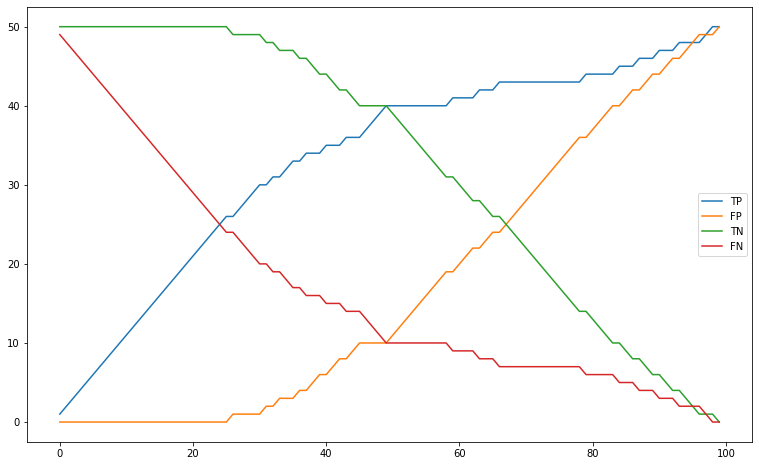

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
dfb[['TP', 'FP', 'TN', 'FN']].plot( figsize=(13,8))
plt.show()

<Figure size 1080x576 with 0 Axes>

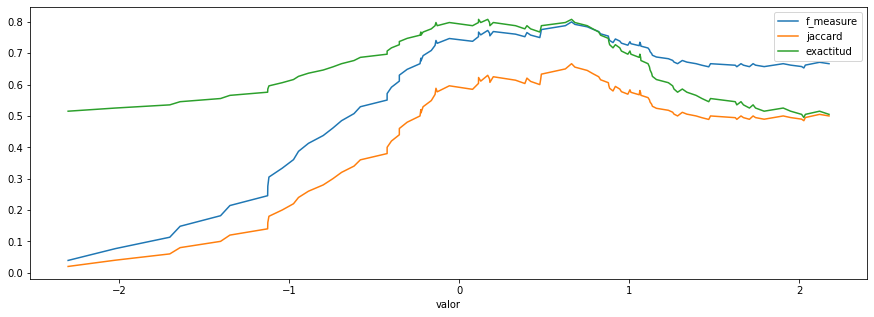

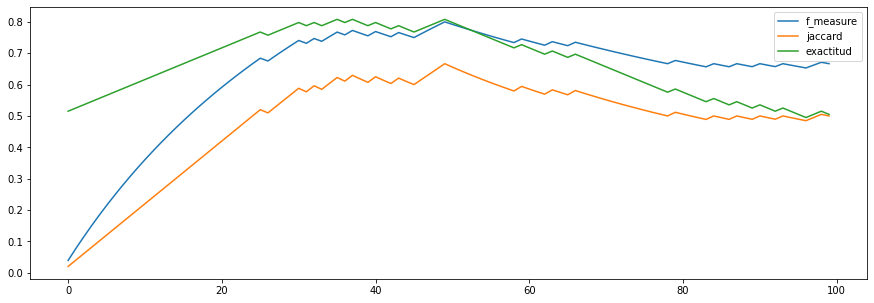

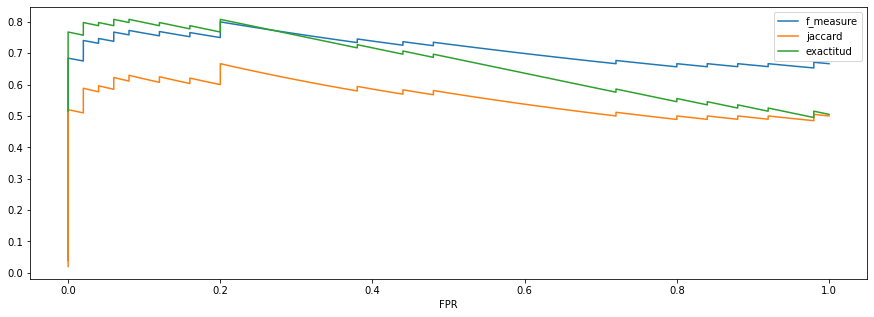

In [217]:
dfb['precision'] = dfb['TP']/ (dfb['TP'] + dfb['FP'])
dfb['f_measure'] = 2* dfb['precision'] * dfb['TPR'] / (dfb['precision'] + dfb['TPR'])
dfb['jaccard'] = dfb['TP']/ (dfb['TP'] + dfb['FP'] + dfb['FN'])
dfb['exactitud'] = ( dfb['TP'] + dfb['TN'] ) / (dfb.index[-1])

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
#Grááfico los tres indicadores para conocer el comportamiento
dfb.plot(x='valor', y=['f_measure', 'jaccard', 'exactitud'], figsize=(15,5))
dfb.plot(y=['f_measure', 'jaccard', 'exactitud'], figsize=(15,5))
dfb.plot(x='FPR', y=['f_measure', 'jaccard', 'exactitud'], figsize=(15,5))

plt.show()

Uso el mááximo de los indicadores para elegir el umbral. Dependiendo de las distribuciones de los datos originales, los indicadores pueden no tener un mááximo muy marcado. Esto tendríía que ver con los desvííos estandar y que tan superpuestas estáán las poblaciones. 

In [218]:
#Encuentro la fila del valor maximo de los indicadores, 
# lo que seríía el mejor punto para ubicar el umbral
max_jaccard = (dfb.loc[dfb['jaccard'] == dfb['jaccard'].max()]) 
max_f_measure = (dfb.loc[dfb['f_measure'] == dfb['f_measure'].max()])
max_exactitud = (dfb.loc[dfb['exactitud'] == dfb['exactitud'].max()])

umbral_roc = dfb['valor'][indice_max[0]] #Este umbral es el que saquéé antes con la curva ROC
umbral_jaccard = max_jaccard['valor']
umbral_f_measure = max_f_measure['valor']
umbral_exactitud = max_exactitud['valor']

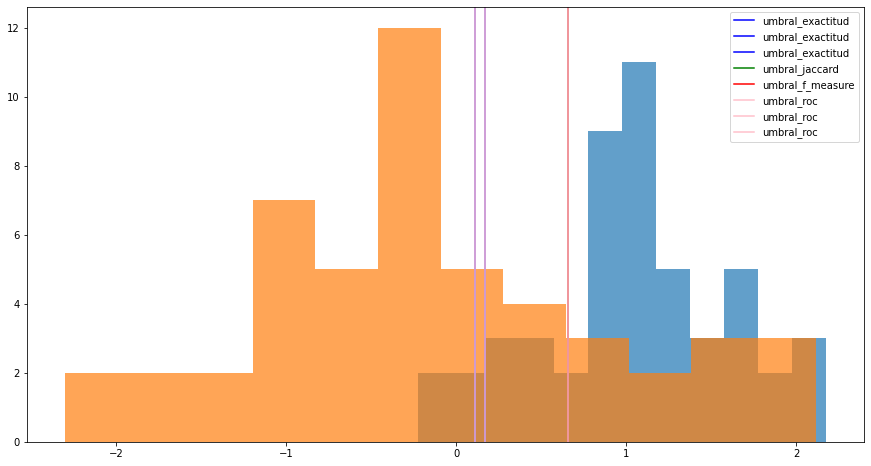

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

#Los for son necesarios porque los umbrales suelen no ser úúnicos
for x in umbral_exactitud.unique(): 
  plt.axvline(x=x, c='blue', label='umbral_exactitud')
for x in umbral_jaccard.unique():
  plt.axvline(x=x, c='green', label='umbral_jaccard')
for x in umbral_f_measure.unique():
  plt.axvline(x=x, c='red', label='umbral_f_measure')
for x in umbral_roc.unique():
  plt.axvline(x=x, c='pink', label='umbral_roc')     

plt.legend()
plt.hist(valores_a, alpha=0.7, bins=12)
plt.hist(valores_b, alpha=0.7, bins=12)
plt.show()